In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt

Loading dataset


In [26]:
#batch_szie
bs = 32

#image size
img_size = 128

train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

In [27]:
dataset = image_dataset_from_directory(
    'Merged_cats_dogs',
    seed = 42,
    batch_size = bs,
    image_size = [img_size,img_size]
)

Found 25000 files belonging to 2 classes.


In [28]:
dataset_size = len(dataset)
train_size = int(train_ratio*dataset_size)
val_size = int(val_ratio*dataset_size)
test_size = int(test_ratio*dataset_size)

In [29]:
train_ds = dataset.take(train_size)
remaining_ds = dataset.skip(train_size)
val_ds = remaining_ds.take(val_size)
test_ds = remaining_ds.skip(val_size)

In [30]:
print("Length of dataset: ",len(dataset))
print("Length of training set: ",len(train_ds))
print("Length of validation set: ",len(val_ds))
print("Length of testing set: ",len(test_ds))

Length of dataset:  782
Length of training set:  547
Length of validation set:  117
Length of testing set:  118


In [75]:
#importing MobileNet model
from tensorflow.keras.applications import MobileNet

def pretrained_model():
    base_model = MobileNet(include_top=False,weights='imagenet', input_shape = (img_size,img_size,3))
    base_model.trainable = False
    
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256,activation = 'relu'),
        layers.Dense(128,activation = 'relu'),
        layers.Dense(64,activation = 'relu'),
        layers.Dropout(0.2),
        layers.Dense(units = 2, activation = 'softmax')
        
    ])

    return model

model = pretrained_model()

model.summary()





Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_128 (Functio  (None, 4, 4, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d_15  (None, 1024)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_35 (Dense)            (None, 256)               262400    
                                                                 
 dense_36 (Dense)            (None, 128)               32896     
                                                                 
 dense_37 (Dense)            (None, 64)                8256      
                                                                 
 dropout_16 (Dropout)        (None, 64)              

In [76]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

model_history = model.fit(train_ds, validation_data = val_ds, epochs = 10)

Epoch 1/10
547/547 [==============================] - 21s 36ms/step - loss: 0.5372 - accuracy: 0.7296 - val_loss: 0.4879 - val_accuracy: 0.7676
Epoch 2/10
547/547 [==============================] - 18s 34ms/step - loss: 0.4810 - accuracy: 0.7660 - val_loss: 0.5221 - val_accuracy: 0.7652
Epoch 3/10
547/547 [==============================] - 18s 34ms/step - loss: 0.4611 - accuracy: 0.7793 - val_loss: 0.4994 - val_accuracy: 0.7489
Epoch 4/10
547/547 [==============================] - 19s 34ms/step - loss: 0.4488 - accuracy: 0.7854 - val_loss: 0.5080 - val_accuracy: 0.7679
Epoch 5/10
547/547 [==============================] - 18s 34ms/step - loss: 0.4325 - accuracy: 0.7927 - val_loss: 0.4694 - val_accuracy: 0.7727
Epoch 6/10
547/547 [==============================] - 20s 36ms/step - loss: 0.4163 - accuracy: 0.8026 - val_loss: 0.4790 - val_accuracy: 0.7759
Epoch 7/10
547/547 [==============================] - 19s 35ms/step - loss: 0.4054 - accuracy: 0.8075 - val_loss: 0.4805 - val_accuracy:

In [77]:
model.evaluate(test_ds)

118/118 [==============================] - 9s 22ms/step - loss: 0.5363 - accuracy: 0.7729


[0.5363455414772034, 0.772921085357666]

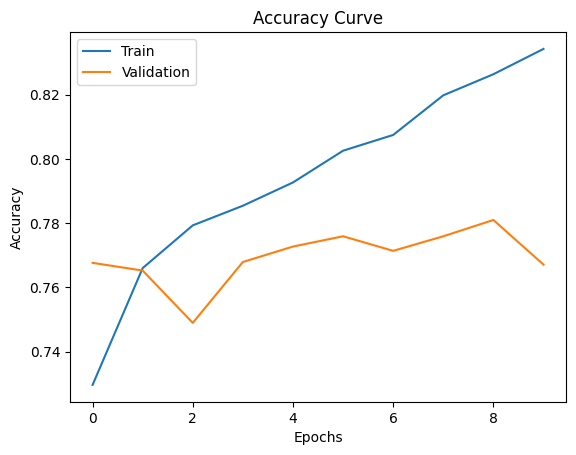

In [78]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend(['Train','Validation'])

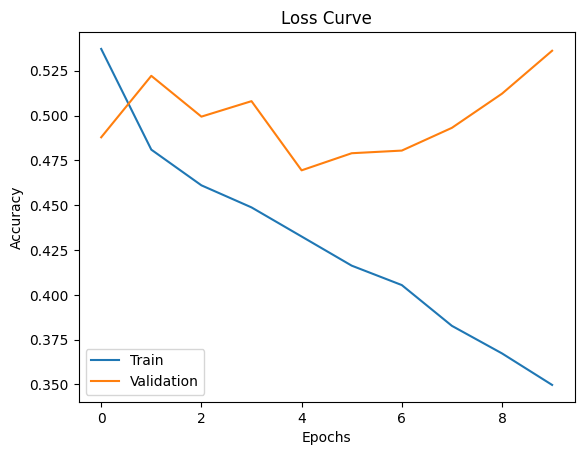

In [79]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Loss Curve')
plt.legend(['Train','Validation'])

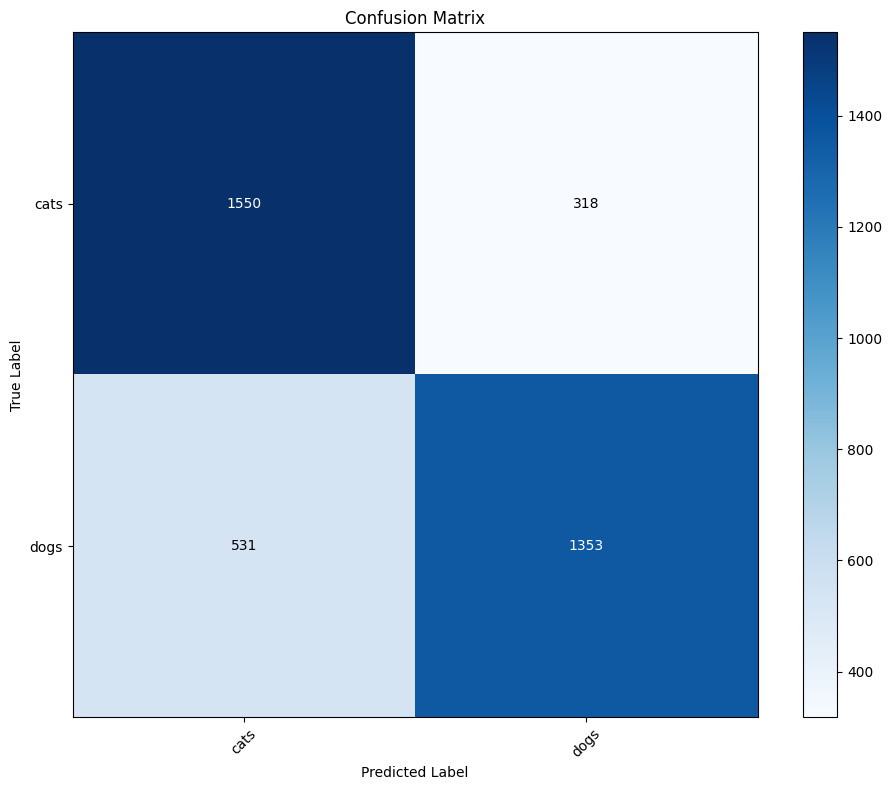

In [80]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_true=[]
y_pred=[]

for images,labels in test_ds:
    predictions=model.predict(images, verbose=0)
    predicted_labels=tf.argmax(predictions, axis=1)
    y_true.extend(labels.numpy())
    y_pred.extend(predicted_labels.numpy())
    
cm=confusion_matrix(y_true,y_pred,labels=range(2))
class_names=dataset.class_names

plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.grid(False)
# Add labels to each cell
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j, i, format(cm[i, j], 'd'),
        ha="center", va="center",
        color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.show()

In [67]:
from tensorflow.keras.applications import VGG16

num_classes = len(dataset.class_names)

def pretrained_model():
    base_model = VGG16(include_top = False, weights = 'imagenet', input_shape=(img_size,img_size,3))
    base_model.trainable = False

    model = Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128,activation = 'relu'),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation = 'softmax')
    ])

    return model

model = pretrained_model()

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 global_average_pooling2d_14  (None, 512)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_33 (Dense)            (None, 128)               65664     
                                                                 
 dropout_15 (Dropout)        (None, 128)               0         
                                                                 
 dense_34 (Dense)            (None, 2)                 258       
                                                                 
Total params: 14,780,610
Trainable params: 65,922
Non-trainable params: 14,714,688
____________________________________

In [69]:
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_history_VGG16 = model.fit(train_ds, validation_data=val_ds,epochs = 10 )

Epoch 1/10


547/547 [==============================] - 48s 86ms/step - loss: 0.4400 - accuracy: 0.9051 - val_loss: 0.1802 - val_accuracy: 0.9292
Epoch 2/10
547/547 [==============================] - 47s 86ms/step - loss: 0.1490 - accuracy: 0.9390 - val_loss: 0.1531 - val_accuracy: 0.9402
Epoch 3/10
547/547 [==============================] - 48s 87ms/step - loss: 0.1163 - accuracy: 0.9533 - val_loss: 0.1618 - val_accuracy: 0.9399
Epoch 4/10
547/547 [==============================] - 47s 86ms/step - loss: 0.0996 - accuracy: 0.9606 - val_loss: 0.1597 - val_accuracy: 0.9423
Epoch 5/10
547/547 [==============================] - 47s 86ms/step - loss: 0.0876 - accuracy: 0.9670 - val_loss: 0.1796 - val_accuracy: 0.9399
Epoch 6/10
547/547 [==============================] - 47s 86ms/step - loss: 0.0766 - accuracy: 0.9716 - val_loss: 0.1764 - val_accuracy: 0.9436
Epoch 7/10
547/547 [==============================] - 47s 86ms/step - loss: 0.0693 - accuracy: 0.9733 - val_loss: 0.1810 - val_accuracy: 0.9402
Epo

In [70]:
model.evaluate(test_ds)

118/118 [==============================] - 14s 63ms/step - loss: 0.2149 - accuracy: 0.9416


[0.2148679941892624, 0.9416311383247375]

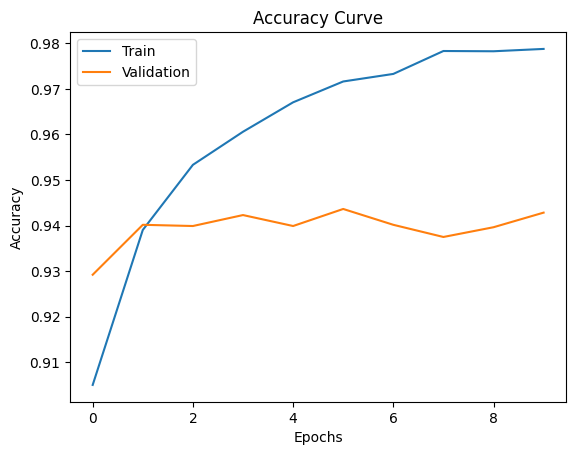

In [71]:
plt.plot(model_history_VGG16.history['accuracy'])
plt.plot(model_history_VGG16.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend(['Train','Validation'])

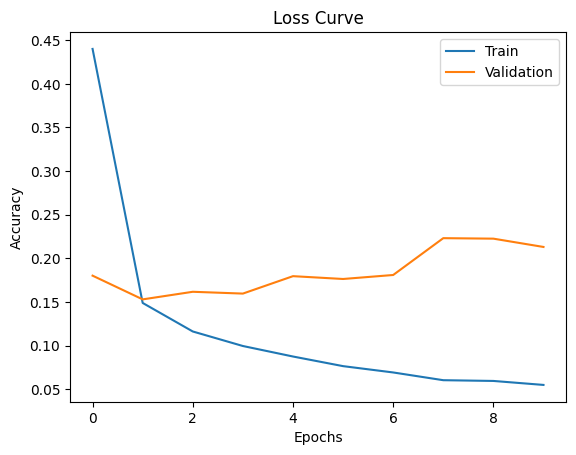

In [72]:
plt.plot(model_history_VGG16.history['loss'])
plt.plot(model_history_VGG16.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Loss Curve')
plt.legend(['Train','Validation'])

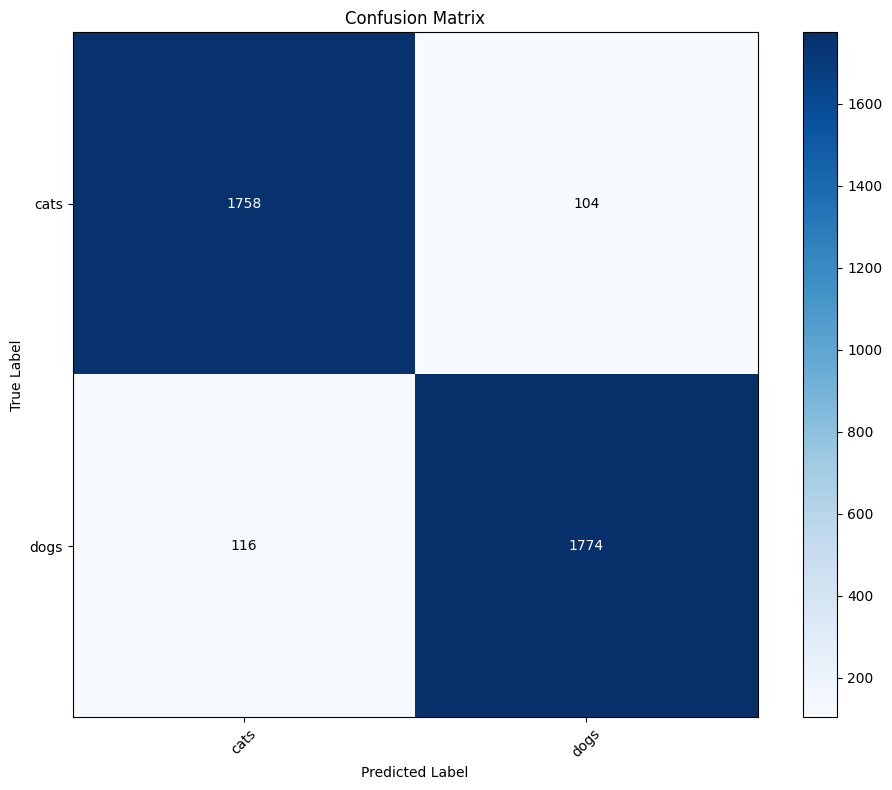

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_true=[]
y_pred=[]

for images,labels in test_ds:
    predictions=model.predict(images, verbose=0)
    predicted_labels=tf.argmax(predictions, axis=1)
    y_true.extend(labels.numpy())
    y_pred.extend(predicted_labels.numpy())
    
cm=confusion_matrix(y_true,y_pred,labels=range(2))
class_names=dataset.class_names

plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.grid(False)
# Add labels to each cell
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j, i, format(cm[i, j], 'd'),
        ha="center", va="center",
        color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.show()